In [1]:
file <- "./tennis.csv"
data <- read.csv(file, header=TRUE, sep=",", stringsAsFactors = FALSE)

# If the target column, say column class, is numerical, you need to convert it to factors in R for classification problem
# data$class <- factor(data$class)
head(data)

outlook,temp,humidity,windy,play
sunny,hot,high,FALSE,no
sunny,hot,high,TRUE,no
overcast,hot,high,FALSE,yes
rainy,mild,high,FALSE,yes
rainy,cool,normal,FALSE,yes
rainy,cool,normal,TRUE,no


In [8]:
# In your homework, you need to split the data into training and testing sets.
smp_size <- floor(0.7 * nrow(data))
set.seed(123)
train_index <- sample(seq_len(nrow(data)), size = smp_size)
train <- data[train_index,]
test <- data[-train_index,]

dim(data)
dim(train)
dim(test)

[1] 14  5

[1] 9 5

[1] 5 5

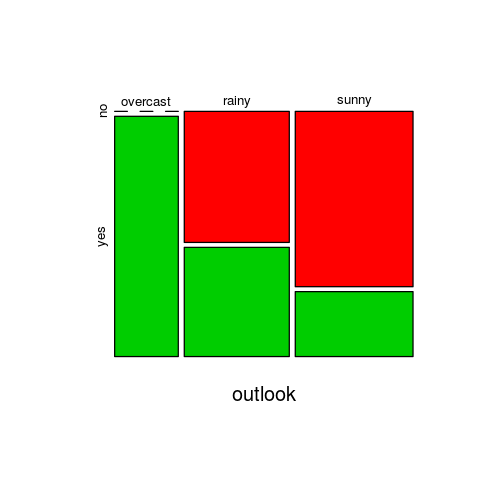

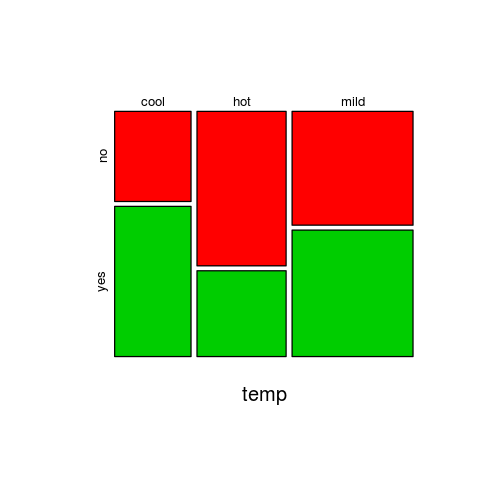

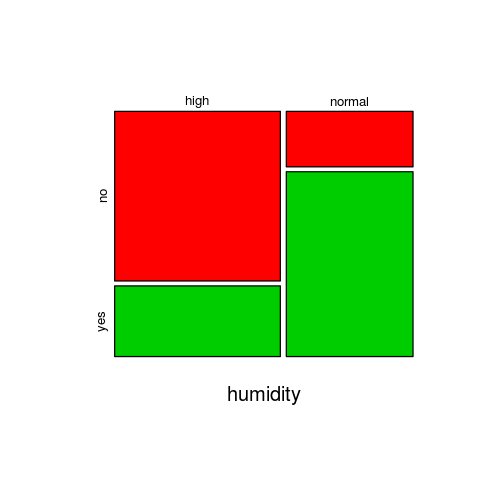

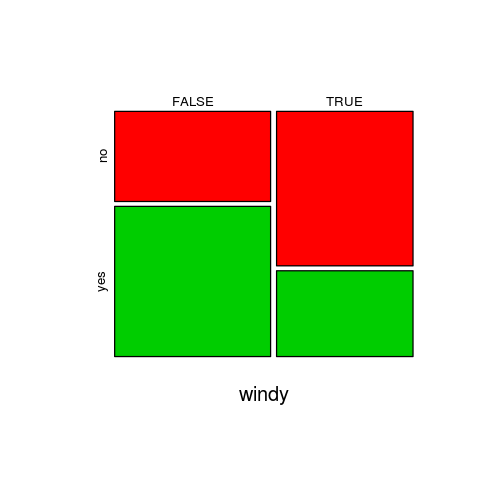

In [15]:
options(repr.plot.width=4, repr.plot.height=4)
library(naivebayes)
nbc <- naive_bayes(play ~ ., data = data)
plot(nbc)

In [11]:
# In your homework, you need to test your model performance on testing data
nbc <- naive_bayes(play ~., data = train)
test_pred <- predict(nbc, test)
accuracy <- sum(test_pred == test$play)/nrow(test)*100
print(paste("Your testing accuracy is ", round(accuracy, 2), "%", sep=""))


[1] "Your testing accuracy is 80%"


In [12]:
# Test the NBC model on a real case
test_data <- data.frame(outlook="sunny", temp="cool", humidity="high", windy="TRUE", stringsAsFactors=FALSE)
predict(nbc, test_data)
head(predict(nbc, test_data, type = "prob"))

[1] yes
Levels: no yes

no,yes
0,1


In [13]:
# NBC with numerical features
iris_file <- "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_data <- read.csv(iris_file, header=FALSE, sep=",", stringsAsFactors=FALSE)
colnames(iris_data) <- c("sepal.length", "sepal.width", "petal.length", 
                         "petal.width", "class")
head(iris_data)

sepal.length,sepal.width,petal.length,petal.width,class
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa


In [14]:
nrows <- nrow(iris_data)
smp_size <- floor(0.75 * nrows)
## set the seed to make your partition reproductible
set.seed(123)
train_ind <- sample(seq_len(nrows), size = smp_size)

train <- iris_data[train_ind, ]
test <- iris_data[-train_ind, ]

dim(train)
dim(test)
dim(iris_data)

[1] 112   5

[1] 38  5

[1] 150   5

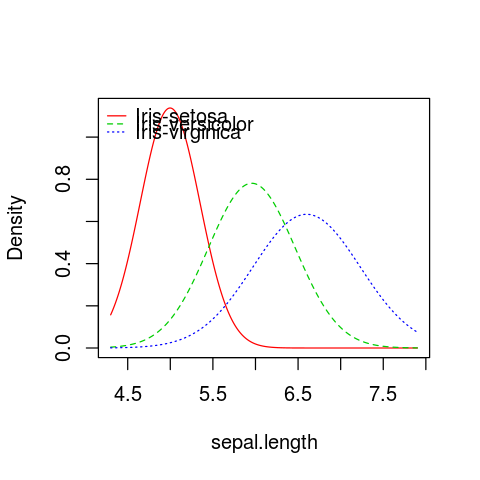

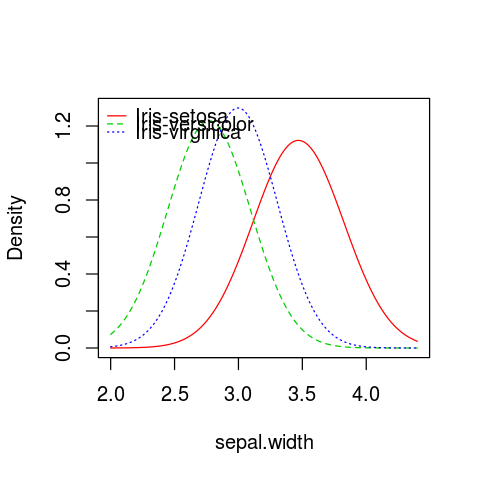

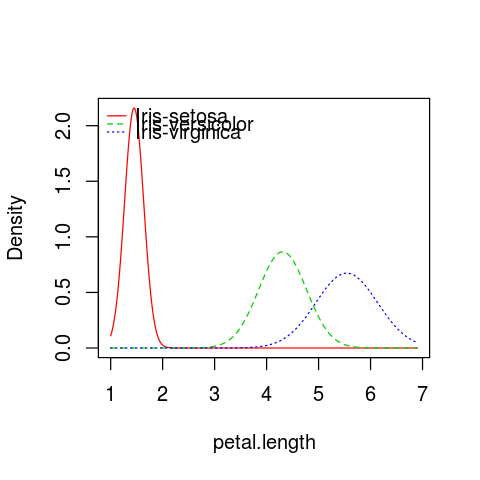

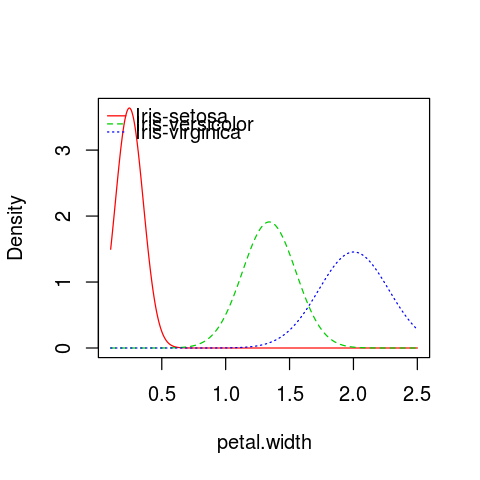

In [16]:
options(repr.plot.width=4, repr.plot.height=4)
iris_nbc <- naive_bayes(class ~ ., data = train)
plot(iris_nbc)

In [17]:
iris_test_pred <- predict(iris_nbc, test)
accuracy <- sum(iris_test_pred==test[,'class'])/length(iris_test_pred)
print(paste("Test accuracy =", round(accuracy*100,2), "%", sep=""))

[1] "Test accuracy =94.74%"
